<a href="https://colab.research.google.com/github/Deadwing5/Fifa-20/blob/master/ExploreML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

from google.colab import files
uploaded = files.upload()   #Saves fifa 20 data

Saving players_20.csv to players_20.csv


In [0]:
import io
fifa_20 = pd.read_csv(io.BytesIO(uploaded['players_20.csv']))

fifa_20  #Prints the data


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,RES,36.0,NaN,2018-07-13,2019.0,NaN,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,...,46,48,28,25,39,41,45,50,52,5,5,13,5,14,

In [0]:
print('Total number of countries : {0}'.format(fifa_20['nationality'].nunique()))
print(fifa_20['nationality'].value_counts().head(5))              #Prints the number of countries available with countries having most players

Total number of countries : 162
England      1667
Germany      1216
Spain        1035
France        984
Argentina     886
Name: nationality, dtype: int64


In [0]:
print('Player with the maximum age : '+str(fifa_20.loc[fifa_20['age'].idxmax()][1]))       #Prints the oldest player in the database

Player with the maximum age : https://sofifa.com/player/142998/cristian-munoz/20/159586


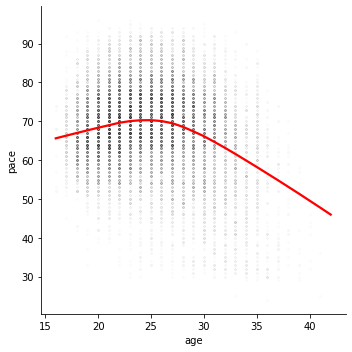

In [0]:

import seaborn as sns

sns.lmplot(data = fifa_20, x = 'age', y = 'pace',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'black'}, 
           line_kws={'color':'red'})       #Shows with a graph how, as the age increases, the pace of the player decreases

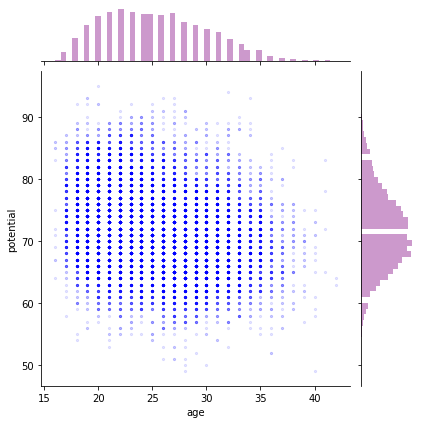

In [0]:
sns.jointplot(x=fifa_20['age'],y=fifa_20['potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'blue'},
              marginal_kws={'color':'purple'})    #Shows how as the age increases, potential decreases in players

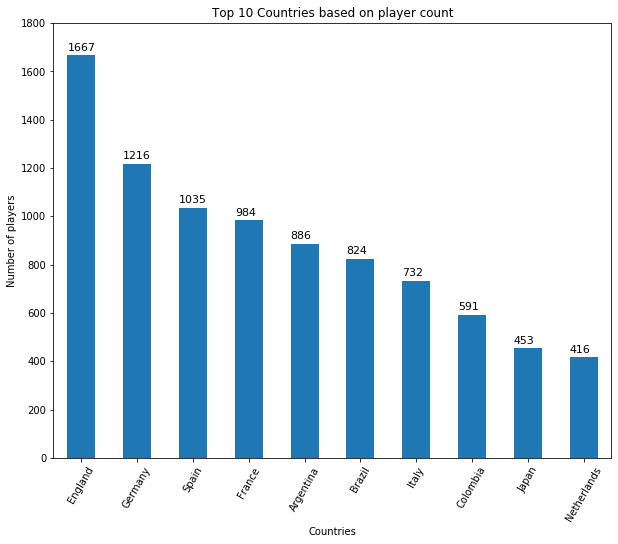

In [0]:
import matplotlib.pyplot as plt

top10_nation_count = fifa_20.groupby('nationality').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,8))
ax=top10_nation_count.plot.bar(rot=60)
plt.ylabel("Number of players")
plt.xlabel("Countries")
plt.title("Top 10 Countries based on player count")
ax.set_ylim(0,1800)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+20, str(i.get_height()),fontsize=11)             #Shows the top 10 countries based on player counts

Text(0.5, 1.0, 'Distribution of Players`s Age in Top 10 Countries')

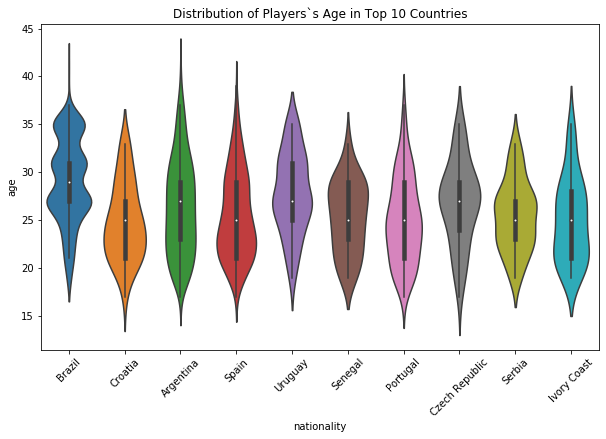

In [0]:


country_count = fifa_20.groupby('nationality').size()   #Grouped by nationality for easy of count
country_count_list = country_count[country_count>100].sort_values(ascending=False).index

fifa_20 = fifa_20[fifa_20['nationality'].isin(country_count_list)]

top10_country = fifa_20.groupby('nationality')['overall'].mean().sort_values(ascending=False).head(10)    #Filters out the top 10 country
top1_country_data = fifa_20.loc[fifa_20['nationality'].isin(top10_country.index) & fifa_20['age']]
top1_country_data

plt.figure(1,figsize=(10,6))
sns.violinplot(data=top1_country_data,x='nationality',y='age')
plt.xticks(rotation=45)
plt.title("Distribution of Players`s Age in Top 10 Countries")       

#Shows the distribution of players based on age

In [0]:
#Shows the players with low wages, yet  high skill moves in them.
sorted_Skills_reverse = fifa_20.sort_values(by=['skill_moves','wage_eur'],ascending=[False,True])[['short_name','club','nationality','wage_eur','skill_moves']]
sorted_Skills_reverse.head(10)

,short_name,club,nationality,wage_eur,skill_moves
16180,Y. Ben El-Mhanni,Scunthorpe United,England,3000,5
6468,G. Mackay-Steven,New York City FC,Scotland,4000,5
7305,Ilsinho,Philadelphia Union,Brazil,4000,5
1931,M. Fernández,Junior FC,Chile,5000,5
1352,L. Acosta,DC United,Argentina,9000,5
490,Nani,Orlando City SC,Portugal,13000,5
510,I. Piatti,Montreal Impact,Argentina,13000,5
2990,A. McGeady,Sunderland,Republic of Ireland,13000,5
96,Z. Ibrahimović,LA Galaxy,Sweden,15000,5
1859,S. Larsson,Feyenoord,Sweden,15000,5
